In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor


In [4]:
np.random.seed(0)

df = pd.read_csv('winequality-red.csv') # Load the data

# The target variable is 'quality'.
Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns


[0.02771784 0.14608857 0.0098873  0.03979135 0.03834853 0.02349039
 0.07114265 0.01940386 0.04327445 0.20548462 0.37537044]


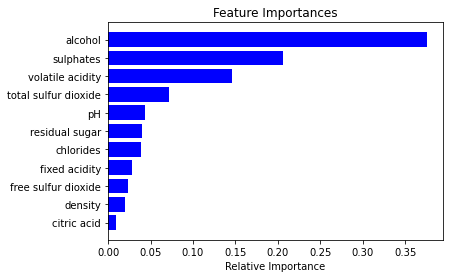

In [6]:
import matplotlib.pyplot as plt

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [8]:
import shap
rf_explainer = shap.KernelExplainer(rf.predict, X_test)
rf_shap_values = rf_explainer.shap_values(X_test, nsamples=50)

ModuleNotFoundError: No module named 'shap'

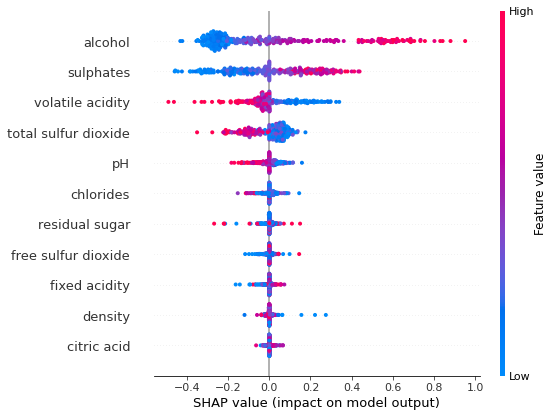

In [18]:
shap.summary_plot(rf_shap_values, X_test)

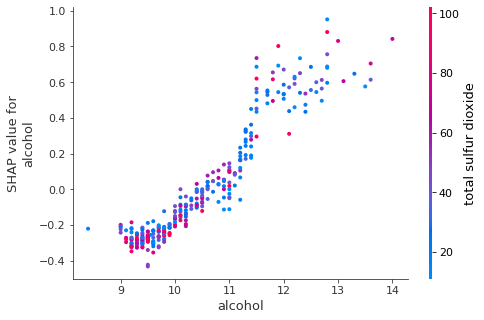

In [19]:
shap.dependence_plot("alcohol", rf_shap_values, X_test)

In [20]:
X_test.mean()

fixed acidity            8.248750
volatile acidity         0.519109
citric acid              0.266156
residual sugar           2.481406
chlorides                0.089234
free sulfur dioxide     15.243750
total sulfur dioxide    43.884375
density                  0.996704
pH                       3.316250
sulphates                0.654438
alcohol                 10.458906
dtype: float64

In [22]:
X_test.iloc[10, :]

fixed acidity            8.60000
volatile acidity         0.52000
citric acid              0.38000
residual sugar           1.50000
chlorides                0.09600
free sulfur dioxide      5.00000
total sulfur dioxide    18.00000
density                  0.99666
pH                       3.20000
sulphates                0.52000
alcohol                  9.40000
Name: 1099, dtype: float64

In [24]:
shap.initjs()
# plot the SHAP values for the 10th observation
shap.force_plot(rf_explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:])

In [27]:
shap.initjs()
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)